In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
life_expectancy_file = "Resources/life_expectancy.csv"
life_expectancy = pd.read_csv(life_expectancy_file)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
life_expectancy_2016 = life_expectancy[['Country Name', '2016']]
life_expectancy_2016.count()


Country Name    264
2016            245
dtype: int64

In [5]:
life_expectancy_2016=life_expectancy_2016.dropna(how='any')
life_expectancy_2016.count()

Country Name    245
2016            245
dtype: int64

In [6]:
top_life_expectancy_2016 = life_expectancy_2016.sort_values(by='2016', ascending=False)
top_life_expectancy_2016 = top_life_expectancy_2016.set_index("Country Name")
top_life_expectancy_2016 = top_life_expectancy_2016.rename(columns={'2016': 'Life Expectancy'})
top_life_expectancy_2016.head()

,Life Expectancy
Country Name,
"Hong Kong SAR, China",84.226829
Japan,83.984878
"Macao SAR, China",83.849000
Switzerland,82.897561
Spain,82.831707


In [7]:
bottom_life_expectancy_2016 = life_expectancy_2016.sort_values(by='2016', ascending=True)
bottom_life_expectancy_2016 = bottom_life_expectancy_2016.set_index("Country Name")
bottom_life_expectancy_2016 = bottom_life_expectancy_2016.rename(columns={'2016': 'Life Expectancy'})
bottom_life_expectancy_2016.head()

,Life Expectancy
Country Name,
Sierra Leone,51.835
Central African Republic,52.171
Chad,52.903
Nigeria,53.428
Cote d'Ivoire,53.582


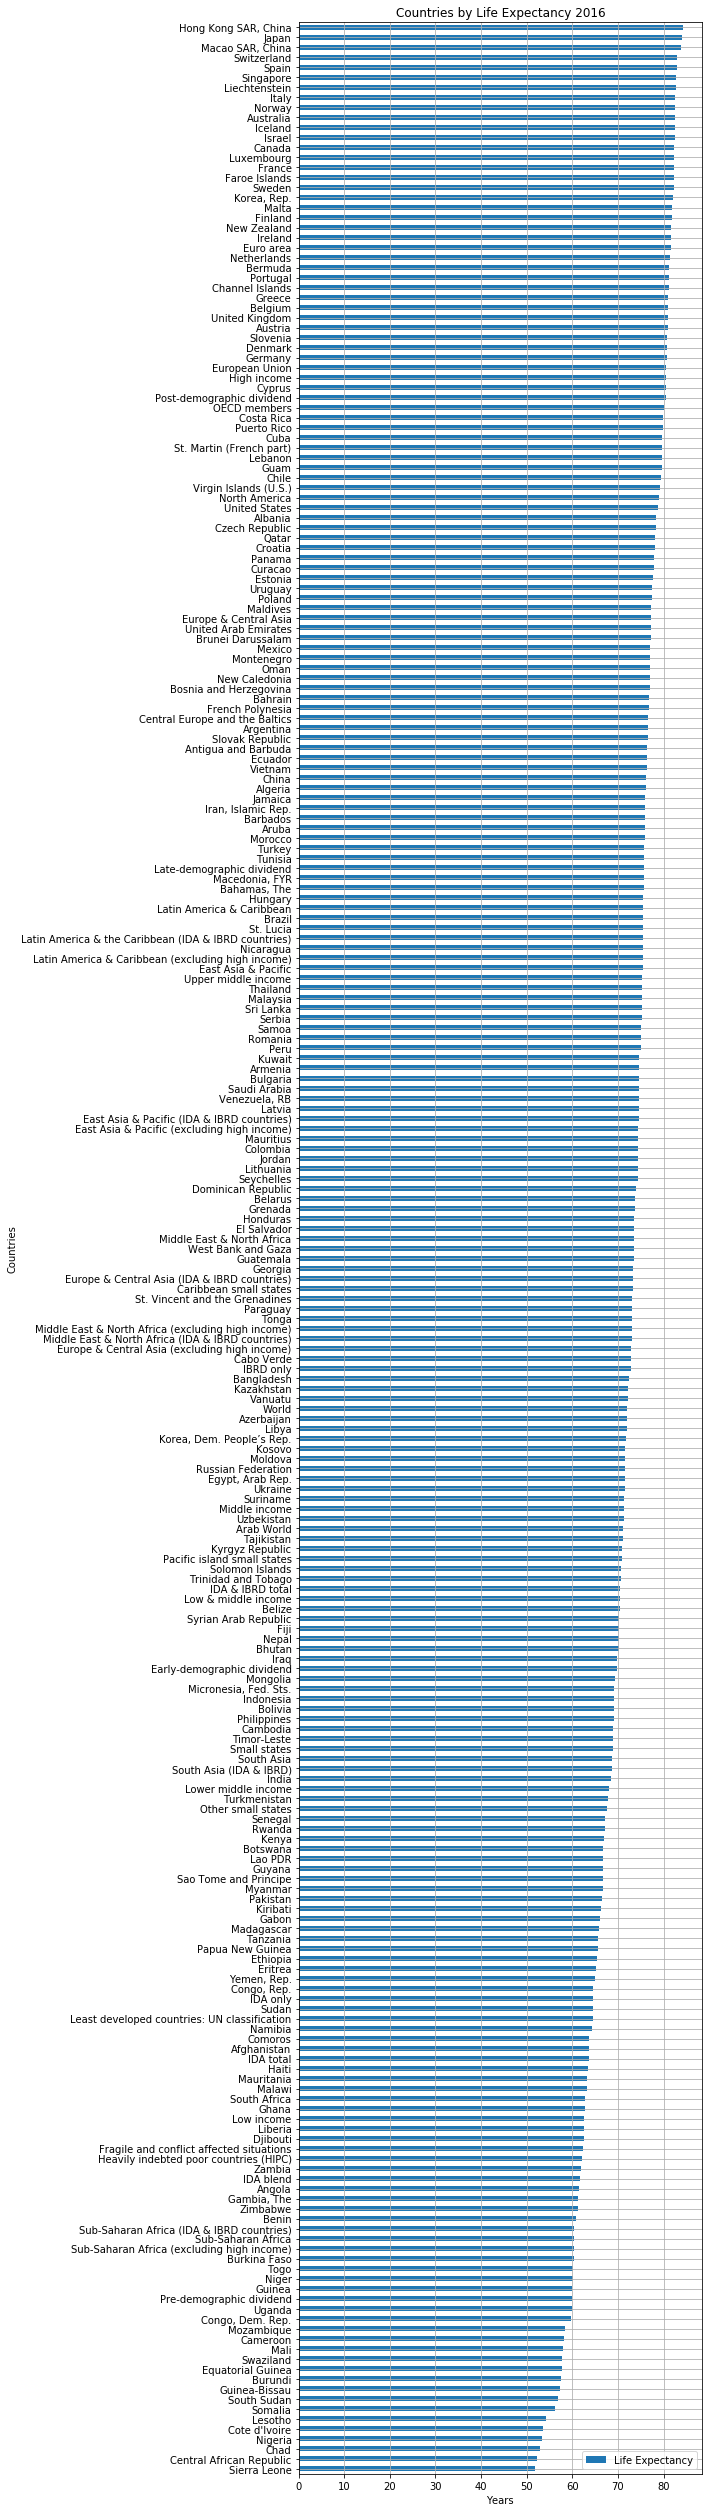

In [8]:
bottom_life_expectancy_2016.plot(kind="barh", figsize=(10,35))

plt.title("Countries by Life Expectancy 2016")
plt.xlabel("Years")
plt.ylabel("Countries")
plt.grid()

plt.tight_layout()
plt.show()

In [9]:
average_changes = pd.DataFrame(life_expectancy.mean())

In [10]:
years = average_changes.index.tolist()
int_years = list(map(int, years))

average = average_changes[0].tolist()

In [11]:
x_axis = np.array(int_years)
y = np.array(average)

# GDP vs Life Expectancy Analysis

In [12]:
gdp_file = "Resources/countries_of_the_world.csv"
gdp = pd.read_csv(gdp_file)
gdp.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [13]:
list(gdp)

['Country',
 'Region',
 'Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [14]:
overall_gdp = gdp.rename(columns= {"Country":"Country Name"})
overall_gdp

,Country Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [15]:
overall_gdp['Country Name'] = overall_gdp['Country Name'].apply(lambda x: x.strip())

In [16]:
repr(overall_gdp['Country Name'][0])

"'Afghanistan'"

In [17]:
overall_gdp

,Country Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [18]:
country_data = pd.merge(overall_gdp, top_life_expectancy_2016, on='Country Name', how="outer")
country_data

,Country Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Life Expectancy
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",63.673000
1,Albania,EASTERN EUROPE,3581655.0,28748.0,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",78.345000
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",76.078000
3,American Samoa,OCEANIA,57794.0,199.0,"290,4","58,29","-20,71","9,27",8000.0,"97,0",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201.0,468.0,"152,1","0,00","6,6","4,05",19000.0,"100,0",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071.0,1246700.0,"9,7","0,13",0,"191,19",1900.0,"42,0",...,"2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246",61.547000
6,Anguilla,LATIN AMER. & CARIB,13477.0,102.0,"132,1","59,80","10,76","21,03",8600.0,"95,0",...,0,0,100,2,"14,17","5,34","0,04","0,18","0,78",NaN
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108.0,443.0,"156,0","34,54","-6,15","19,46",11000.0,"89,0",...,"18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743",NaN
8,Argentina,LATIN AMER. & CARIB,39921833.0,2766890.0,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547",76.577000
9,Armenia,C.W. OF IND. STATES,2976372.0,29800.0,"99,9","0,00","-6,47","23,28",3500.0,"98,6",...,"17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418",74.618000


In [19]:
clean_country = country_data.dropna(axis=0, how='any', inplace=False)
clean_country

,Country Name,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Life Expectancy
0,Afghanistan,ASIA (EX. NEAR EAST),3.105700e+07,647500.0,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",63.673000
1,Albania,EASTERN EUROPE,3.581655e+06,28748.0,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",78.345000
2,Algeria,NORTHERN AFRICA,3.293009e+07,2381740.0,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",76.078000
8,Argentina,LATIN AMER. & CARIB,3.992183e+07,2766890.0,"14,4","0,18","0,61","15,18",11200.0,"97,1",...,"12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547",76.577000
9,Armenia,C.W. OF IND. STATES,2.976372e+06,29800.0,"99,9","0,00","-6,47","23,28",3500.0,"98,6",...,"17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418",74.618000
10,Aruba,LATIN AMER. & CARIB,7.189100e+04,193.0,"372,5","35,49",0,"5,89",28000.0,"97,0",...,"10,53",0,"89,47",2,"11,03","6,68","0,004","0,333","0,663",75.867000
11,Australia,OCEANIA,2.026408e+07,7686850.0,"2,6","0,34","3,98","4,69",29000.0,"100,0",...,"6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7",82.500000
12,Austria,WESTERN EUROPE,8.192880e+06,83870.0,"97,7","0,00",2,"4,66",30000.0,"98,0",...,"16,91","0,86","82,23",3,"8,74","9,76","0,018","0,304","0,678",80.890244
13,Azerbaijan,C.W. OF IND. STATES,7.961619e+06,86600.0,"91,9","0,00","-4,9","81,74",3400.0,"97,0",...,"19,63","2,71","77,66",1,"20,74","9,75","0,141","0,457","0,402",72.026000
14,"Bahamas, The",LATIN AMER. & CARIB,3.037700e+05,13940.0,"21,8","25,41","-2,2","25,21",16700.0,"95,6",...,"0,8","0,4","98,8",2,"17,57","9,05","0,03","0,07","0,9",75.675000


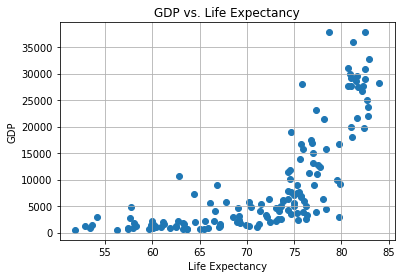

In [20]:
# Build a scatter plot for GDP and Life Expectancy
plt.scatter(clean_country["Life Expectancy"], clean_country["GDP ($ per capita)"], marker="o")

# Incorporate the other graph properties
plt.title("GDP vs. Life Expectancy")
plt.ylabel("GDP")
plt.xlabel("Life Expectancy")
plt.grid(True)

# Show plot
plt.show()


In [21]:
life_expectancy_gdp = clean_country[['GDP ($ per capita)', 'Life Expectancy']]
life_expectancy_gdp.head()

,GDP ($ per capita),Life Expectancy
0,700.0,63.673
1,4500.0,78.345
2,6000.0,76.078
8,11200.0,76.577
9,3500.0,74.618


In [22]:
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = [40,45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
life_expectancy_gdp['binned'] = pd.cut(life_expectancy_gdp['Life Expectancy'], bins=bins, labels=labels)
life_expectancy_gdp.head()

/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GDP ($ per capita),Life Expectancy,binned
0,700.0,63.673,60
1,4500.0,78.345,75
2,6000.0,76.078,75
8,11200.0,76.577,75
9,3500.0,74.618,70


In [23]:
#life_expectancy_gdp_mean = (life_expectancy_gdp['binned']=='50').sum()
life_expectancy_gdp.dtypes

GDP ($ per capita)     float64
Life Expectancy        float64
binned                category
dtype: object

In [24]:
life_expectancy_gdp_data = life_expectancy_gdp.set_index("binned")
life_expectancy_gdp_data = life_expectancy_gdp_data.sort_values(by='binned', ascending=True)
life_expectancy_gdp_data.head()

,GDP ($ per capita),Life Expectancy
binned,,
50,1400.0,53.582
50,1200.0,52.903
50,500.0,51.835
50,900.0,53.428
50,3000.0,54.174


In [25]:
le_gdp_data = life_expectancy_gdp_data.groupby(['binned'])['GDP ($ per capita)'].mean()
le_gdp_data

binned
50     1400.000000
55     1550.000000
60     2142.105263
65     2789.473684
70     5453.333333
75    11097.368421
80    27400.000000
Name: GDP ($ per capita), dtype: float64

In [26]:
le_gdp_df = pd.DataFrame(le_gdp_data)
le_gdp_df

,GDP ($ per capita)
binned,
50,1400.000000
55,1550.000000
60,2142.105263
65,2789.473684
70,5453.333333
75,11097.368421
80,27400.000000


In [27]:
le_gdp_df = pd.DataFrame(le_gdp_data)
le_gdp_df

,GDP ($ per capita)
binned,
50,1400.000000
55,1550.000000
60,2142.105263
65,2789.473684
70,5453.333333
75,11097.368421
80,27400.000000


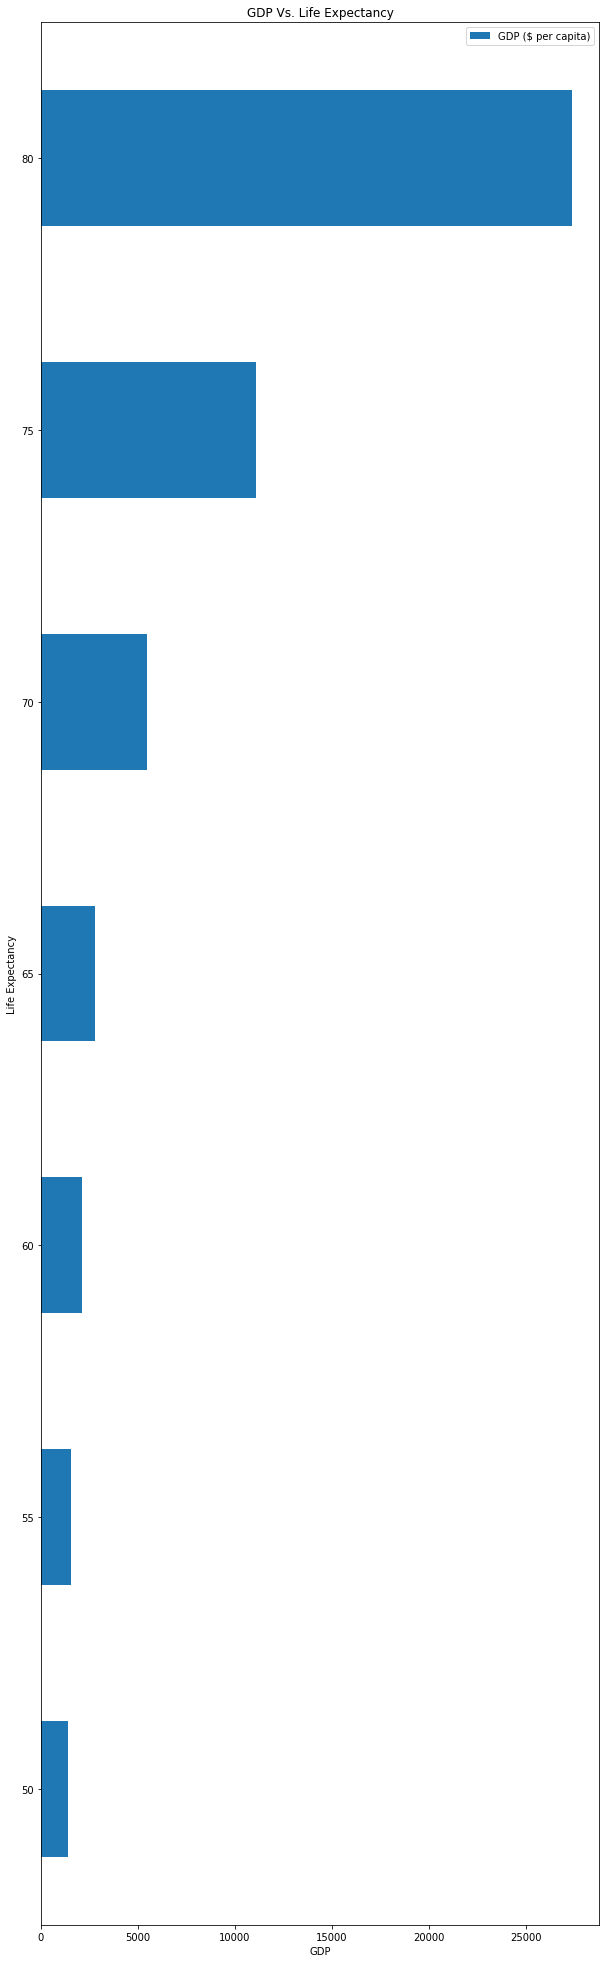

In [28]:
le_gdp_df.plot(kind="barh", figsize=(10,35))

plt.title("GDP Vs. Life Expectancy")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")

plt.show()

In [48]:
life_expectancy_gdp_br = clean_country[['GDP ($ per capita)', 'Life Expectancy','Birthrate']]
life_expectancy_gdp_br.head()

,GDP ($ per capita),Life Expectancy,Birthrate
0,700.0,63.673,"46,6"
1,4500.0,78.345,"15,11"
2,6000.0,76.078,"17,14"
8,11200.0,76.577,"16,73"
9,3500.0,74.618,"12,07"


In [49]:
clean_country[['Birthrate']].min()

Birthrate    10,04
dtype: object

In [50]:
clean_country[['Birthrate']].max()

Birthrate    9,85
dtype: object

In [ ]:
bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = [40,45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
life_expectancy_gdp['binned'] = pd.cut(life_expectancy_gdp['Life Expectancy'], bins=bins, labels=labels)
life_expectancy_gdp.head()

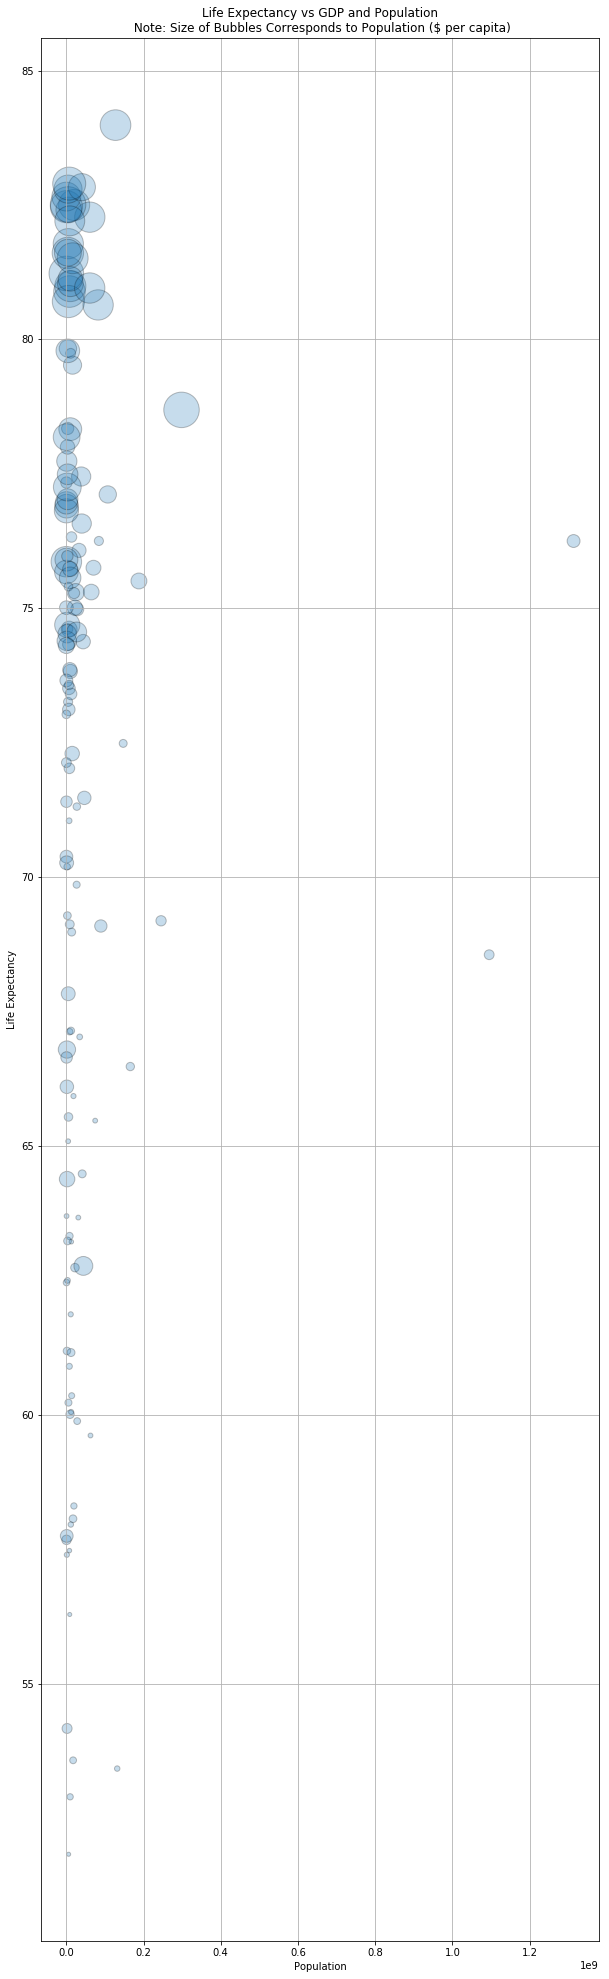

In [63]:
# life expectancy, gdp, population bubbble chart. Size will be population
plt.figure(figsize=(10,35))
x = clean_country['Population']
y = clean_country['Life Expectancy']
z = clean_country['GDP ($ per capita)']

plt.scatter(x, y, s=z/30,alpha=0.25, edgecolors="black", linewidth=1)
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title('Life Expectancy vs GDP and Population'
        '\n Note: Size of Bubbles Corresponds to Population ($ per capita)')

plt.grid()
#plt.savefig(“life_expectancy_climate.png”)
plt.show()

# Healthcare vs. Life Expectancy

In [30]:
insurance_file = "Resources/countries_healthcare.csv"
insurance = pd.read_csv(insurance_file)
insurance.head()

,Country,Free health care,Universal health care
0,Afghanistan,No,No
1,Albania,Yes,Yes
2,Algeria,Yes,Yes
3,Andorra,Yes,Yes
4,Angola,No,No


In [31]:
overall_insurance = insurance.rename(columns={'Country':'Country Name'})
overall_insurance.head()

,Country Name,Free health care,Universal health care
0,Afghanistan,No,No
1,Albania,Yes,Yes
2,Algeria,Yes,Yes
3,Andorra,Yes,Yes
4,Angola,No,No


In [32]:
country_healthcare = pd.merge(overall_insurance, top_life_expectancy_2016, on='Country Name', how="outer")
country_healthcare


,Country Name,Free health care,Universal health care,Life Expectancy
0,Afghanistan,No,No,63.673000
1,Albania,Yes,Yes,78.345000
2,Algeria,Yes,Yes,76.078000
3,Andorra,Yes,Yes,NaN
4,Angola,No,No,61.547000
5,Antigua and Barbuda,Yes,Yes,76.364000
6,Argentina,Yes,Yes,76.577000
7,Armenia,Yes,No,74.618000
8,Australia,Yes,Yes,82.500000
9,Austria,Yes,Yes,80.890244


In [51]:
country_healthcare = country_healthcare.dropna(axis=0, how='any', inplace=False)
country_healthcare

,Country Name,Free health care,Universal health care,Life Expectancy
0,Afghanistan,No,No,63.673000
1,Albania,Yes,Yes,78.345000
2,Algeria,Yes,Yes,76.078000
4,Angola,No,No,61.547000
5,Antigua and Barbuda,Yes,Yes,76.364000
6,Argentina,Yes,Yes,76.577000
7,Armenia,Yes,No,74.618000
8,Australia,Yes,Yes,82.500000
9,Austria,Yes,Yes,80.890244
10,Azerbaijan,Yes,No,72.026000


In [53]:
free_healthcare = country_healthcare.groupby('Free health care').agg({'Life Expectancy':'mean'})
free_healthcare

,Life Expectancy
Free health care,
No,64.452285
Yes,73.909752


/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


(array([0, 1]), <a list of 2 Text xticklabel objects>)

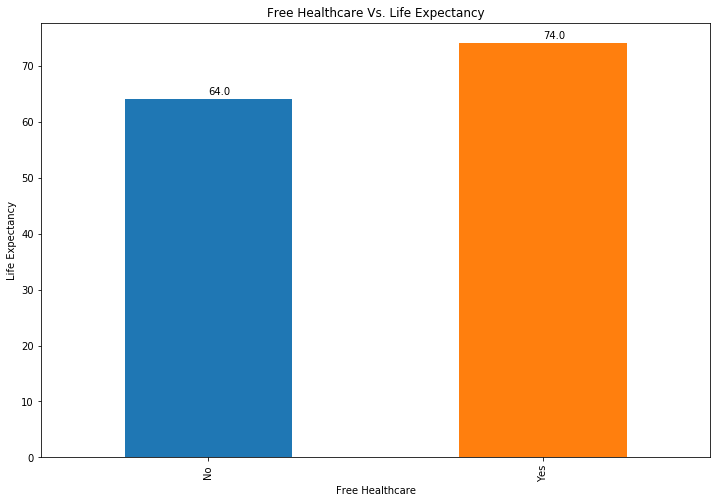

In [105]:
# Bring some raw data.
frequencies = [64, 74]

# In my original code I create a series and run on that, 
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['No', 'Yes']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Free Healthcare Vs. Life Expectancy')
ax.set_xlabel('Free Healthcare', rotation='horizontal')
ax.set_ylabel('Life Expectancy')
ax.set_xticklabels(x_labels)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() /2

    # Number of points between bar and label. Change to your liking.
    #space = 5
    # Vertical alignment for positive values
    #va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
       # va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='left',                # Horizontally center label
        )                      # Vertically align label differently for
                                    # positive and negative values.
    
plt.xticks(rotation=90)
#va=va
#plt.savefig("image.png")


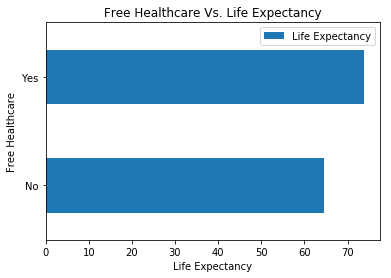

In [71]:
free_healthcare.plot(kind="barh")
                     #,figsize=(10,35))

plt.title("Free Healthcare Vs. Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Free Healthcare")

plt.show()

In [54]:
universal_healthcare = country_healthcare.groupby('Universal health care').agg({'Life Expectancy':'mean'})
universal_healthcare

,Life Expectancy
Universal health care,
No,65.735039
Yes,75.857583


/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


(array([0, 1]), <a list of 2 Text xticklabel objects>)

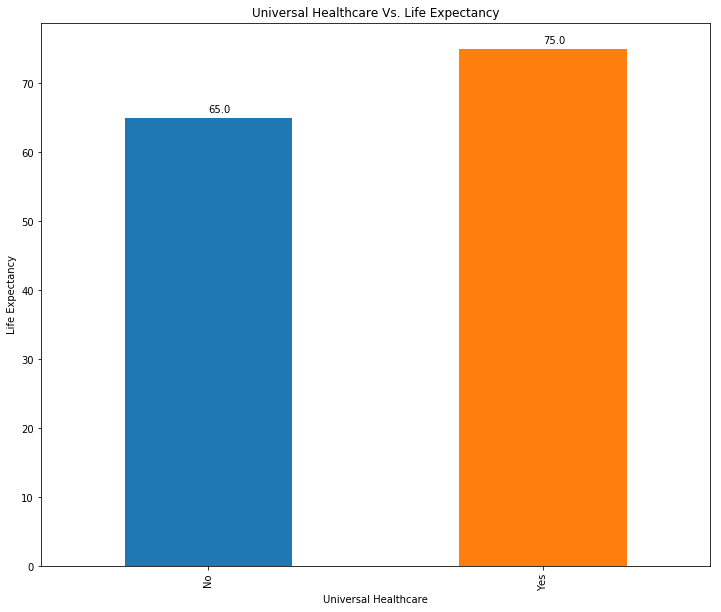

In [106]:
# Bring some raw data.
frequencies = [65, 75]

# In my original code I create a series and run on that, 
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['No', 'Yes']

# Plot the figure.
plt.figure(figsize=(12, 10))
ax = freq_series.plot(kind='bar')
ax.set_title('Universal Healthcare Vs. Life Expectancy')
ax.set_xlabel('Universal Healthcare')
ax.set_ylabel('Life Expectancy')
ax.set_xticklabels(x_labels)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() /2

    # Number of points between bar and label. Change to your liking.
    #space = 5
    # Vertical alignment for positive values
    #va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
       # va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='left',                # Horizontally center label
        )                      # Vertically align label differently for
                                    # positive and negative values.
    
plt.xticks(rotation=90)
#va=va
#plt.savefig("image.png")


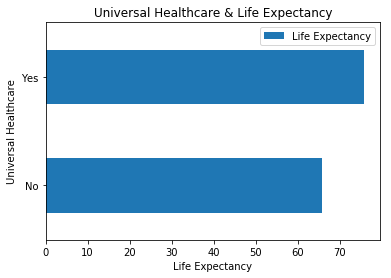

In [74]:
universal_healthcare.plot(kind="barh")
plt.title("Universal Healthcare & Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Universal Healthcare")

plt.show()